In [24]:
from tensorflow import keras 
import tensorflow as tf
import numpy as np

In [33]:
path = "data/fruits-360_dataset/fruits-360/Training"

train_ds = keras.utils.image_dataset_from_directory(
    path, image_size = (100, 100), seed = 123, batch_size = 32, validation_split=0.2, subset="training",
)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [34]:
path = "data/fruits-360_dataset/fruits-360/Training"

val_ds = keras.utils.image_dataset_from_directory(
    path, image_size = (100, 100), seed = 123, batch_size = 32, validation_split=0.2, subset="validation",
)

Found 67692 files belonging to 131 classes.
Using 13538 files for validation.


In [35]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

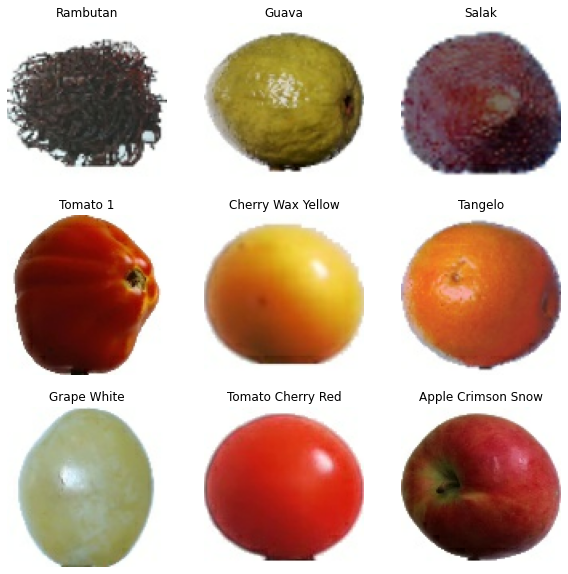

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for x, y in train_ds:
    print( type(x))
    print( type(y))
    print(x.shape)
    print(y.shape)

    break

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(32, 100, 100, 3)
(32,)


In [8]:
train_ds

<BatchDataset shapes: ((None, 100, 100, 3), (None,)), types: (tf.float32, tf.int32)>

In [36]:
class_names = train_ds.class_names
len(class_names)

131

In [11]:
import tensorflow_datasets as tfds

In [37]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [38]:
num_classes = 131

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [39]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [40]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
1002/1693 [================>.............] - ETA: 1:18 - loss: 0.8329 - accuracy: 0.7928

KeyboardInterrupt: 